In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn statsmodels 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOAD THE DATASET 

# Load the Online Retail dataset and take some sample as data
df = pd.read_csv('D:\\Project Project UCI\\OnlineRetailUCI.csv',encoding='ISO-8859-1')
print(df.columns) 
data=df.head(50)
print(data)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BED

In [5]:
# DATA PREPROCESSING
# DATA CLEANING

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing CustomerID, InvoiceNo, UnitPrice
data.dropna(subset=['CustomerID','InvoiceNo', 'UnitPrice'], inplace=True)

# Remove canceled orders (InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].str.startswith('C')]

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a new column for total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [6]:
# DATA CLUSTERING

from sklearn.cluster import KMeans

# Prepare data for clustering
X = data[['Quantity', 'TotalPrice']]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# Display clusters
print(data['Cluster'].value_counts())


Cluster
1    35
0    14
2     1
Name: count, dtype: int64


In [7]:
# STATISTICAL SUMMARY OF THE DATASET

# Summary
summary = data.describe()
print(summary)

        Quantity                    InvoiceDate  UnitPrice    CustomerID  \
count  50.000000                             50  50.000000     50.000000   
mean   14.000000  2010-12-01 08:39:13.200000256   3.569000  14028.140000   
min     2.000000            2010-12-01 08:26:00   0.420000  12583.000000   
25%     6.000000            2010-12-01 08:34:00   1.850000  12583.000000   
50%     6.000000            2010-12-01 08:34:30   2.950000  13047.000000   
75%    24.000000            2010-12-01 08:45:00   4.250000  13572.750000   
max    80.000000            2010-12-01 09:02:00  18.000000  17850.000000   
std    14.337051                            NaN   2.978013   2182.917183   

       TotalPrice    Cluster  
count   50.000000  50.000000  
mean    32.506200   0.740000  
min      9.900000   0.000000  
25%     14.850000   0.000000  
50%     20.340000   1.000000  
75%     43.950000   1.000000  
max    204.000000   2.000000  
std     32.024404   0.486973  


In [8]:
# STATISTICAL INFO OF THE DATASET

# Info
info = data.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    50 non-null     object        
 1   StockCode    50 non-null     object        
 2   Description  50 non-null     object        
 3   Quantity     50 non-null     int64         
 4   InvoiceDate  50 non-null     datetime64[ns]
 5   UnitPrice    50 non-null     float64       
 6   CustomerID   50 non-null     float64       
 7   Country      50 non-null     object        
 8   TotalPrice   50 non-null     float64       
 9   Cluster      50 non-null     int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 3.8+ KB
None


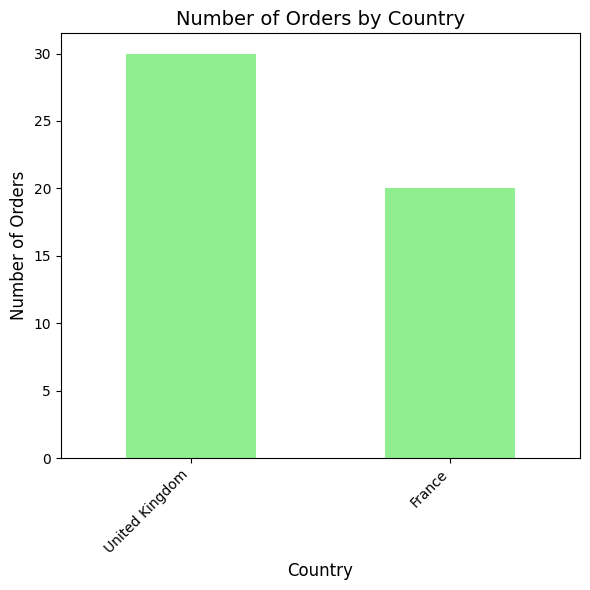

In [9]:
# BAR PLOT

# Bar plot for Number of orders by Country
# Drop rows with missing country information
df_clean = data.dropna(subset=['Country'])

# Count the number of orders for each country
country_counts = df_clean['Country'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 6))
country_counts.plot(kind='bar', color='lightgreen')

# Add titles and labels
plt.title('Number of Orders by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


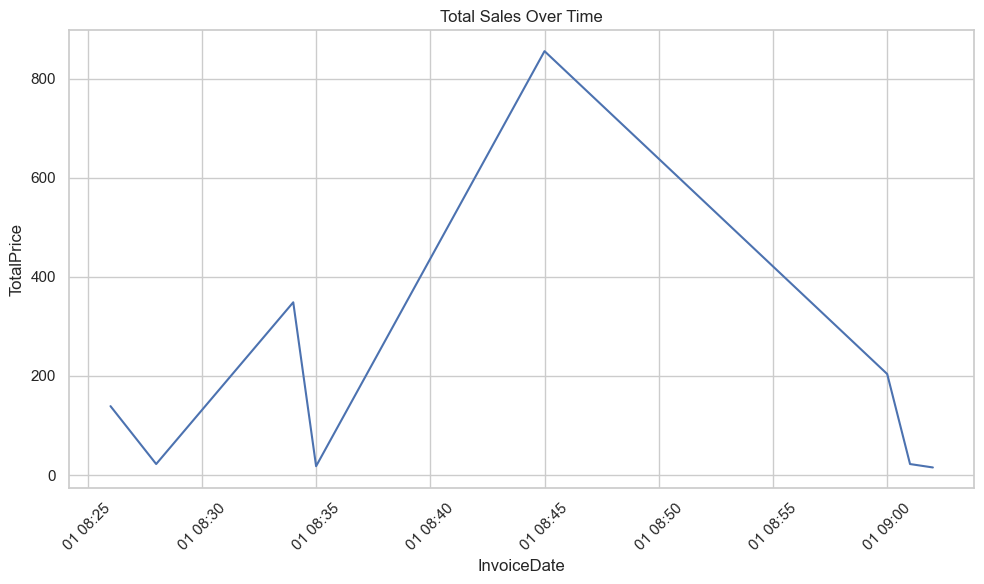

In [10]:
#LINE PLOT

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Line Plot of Total sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.groupby('InvoiceDate')['TotalPrice'].sum().reset_index(), x='InvoiceDate', y='TotalPrice')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

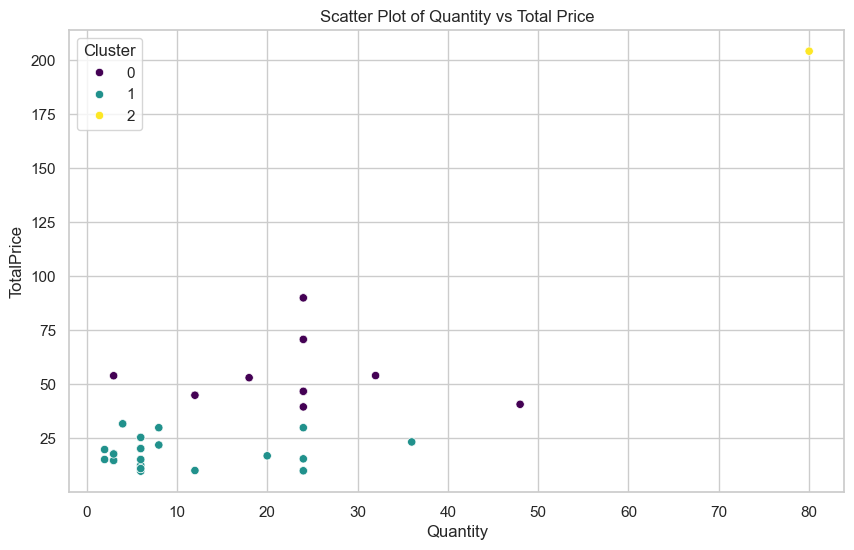

In [11]:
# SCATTER PLOT

# Scatter plot of Quantity vs TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', hue='Cluster', data=data, palette='viridis')
plt.title('Scatter Plot of Quantity vs Total Price')
plt.show()


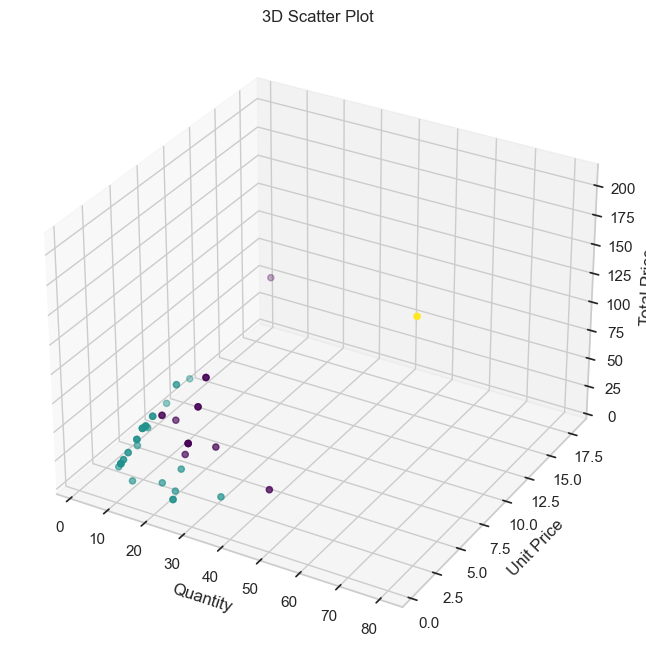

In [12]:
# 3D SCATTER PLOT
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for Quantity, Unit_Price and Total_Price
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Quantity'], data['UnitPrice'], data['TotalPrice'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Price')
ax.set_zlabel('Total Price')
plt.title('3D Scatter Plot')
plt.show()


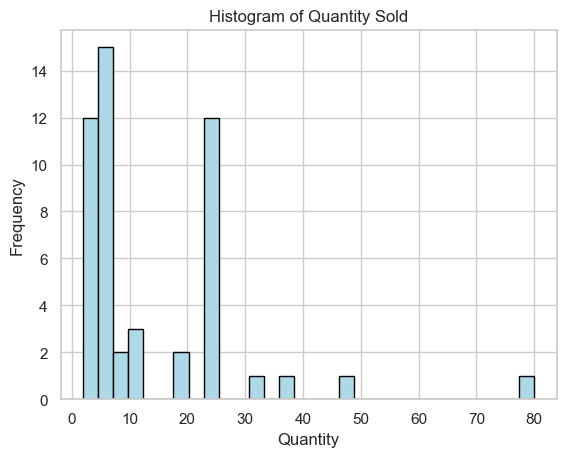

In [13]:
#HISTOGRAM

# Histogram of Quantity sold
plt.hist(data['Quantity'], bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


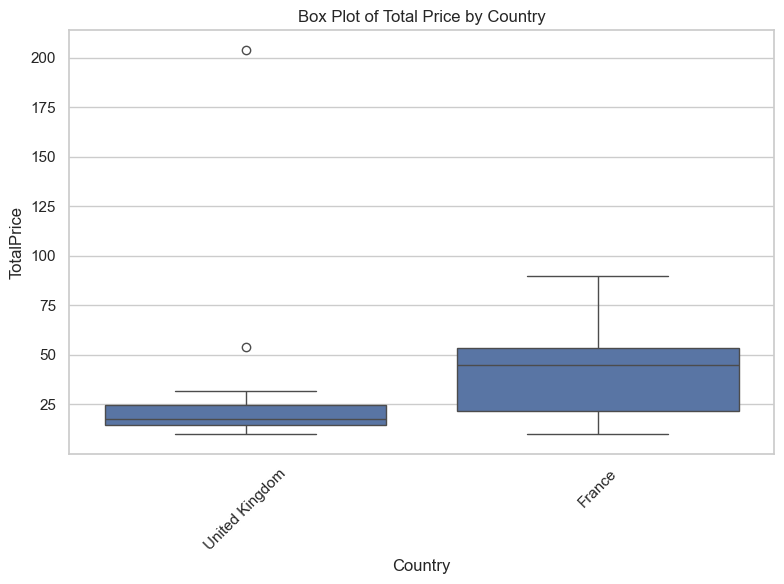

In [14]:
# BOX PLOT

# Box Plot of Total Price by Country
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='TotalPrice', data=data)
plt.title('Box Plot of Total Price by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


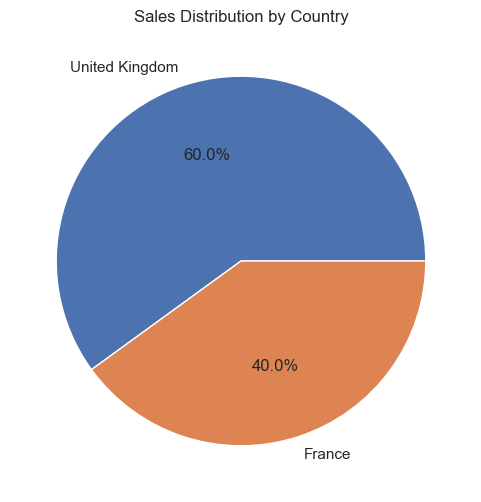

In [15]:
# PIE CHART

# Pie chart of sales distribution by country
country_sales = data['Country'].value_counts()
country_sales.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sales Distribution by Country')
plt.ylabel('')
plt.show()


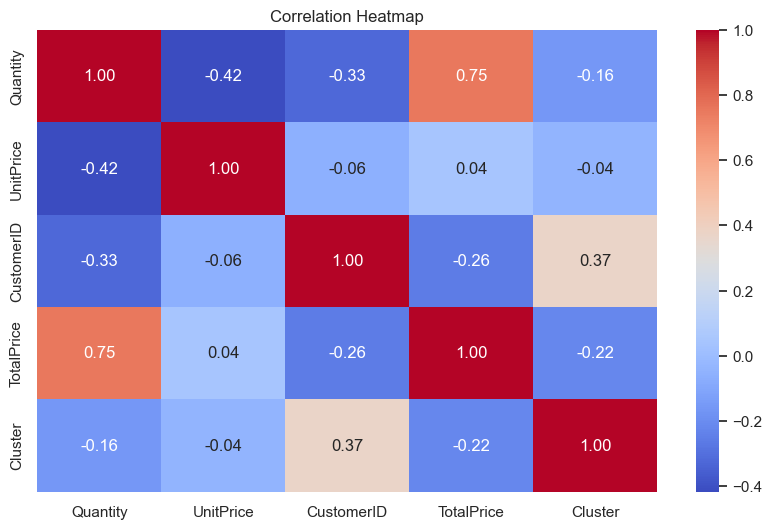

In [16]:
# HEATMAP

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
# IQR 

# Anomaly Detection using IQR Method(On Unit price)
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:',IQR)

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['UnitPrice'] < lower_bound) | (data['UnitPrice'] > upper_bound)]
print(outliers)


IQR: 2.4
   InvoiceNo StockCode                     Description  Quantity  \
16    536367     22622  BOX OF VINTAGE ALPHABET BLOCKS         2   
19    536367     21777     RECIPE BOX WITH METAL HEART         4   
20    536367     48187             DOORMAT NEW ENGLAND         4   
45    536370      POST                         POSTAGE         3   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
16 2010-12-01 08:34:00       9.95     13047.0  United Kingdom        19.9   
19 2010-12-01 08:34:00       7.95     13047.0  United Kingdom        31.8   
20 2010-12-01 08:34:00       7.95     13047.0  United Kingdom        31.8   
45 2010-12-01 08:45:00      18.00     12583.0          France        54.0   

    Cluster  
16        1  
19        1  
20        1  
45        0  


In [18]:
# T-TEST

from scipy import stats

# T-Test between two groups (On Total_Price)
group1 = data[data['Cluster'] == 0]['TotalPrice']
group2 = data[data['Cluster'] == 1]['TotalPrice']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')


T-Statistic: 11.619127805112706, P-Value: 2.031438812643064e-15


In [19]:
# F-TEST

# F-Test for variance (On Total_Price)
f_stat, p_value_f = stats.levene(group1, group2)
print(f'F-Statistic: {f_stat}, P-Value: {p_value_f}')


F-Statistic: 7.885335614906198, P-Value: 0.007235711885377416


In [20]:
# CHI-SQUARE TEST

# Chi-Square Test (On Country as attribute with Cluster as data)
contingency_table = pd.crosstab(data['Country'], data['Cluster'])
chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, P-Value: {p_chi2}')


Chi-Square Statistic: 22.797619047619047, P-Value: 1.1208820737194382e-05


In [21]:
# ONE-WAY ANOVA TEST

# One-way anova test (On Total Price)
anova_result = stats.f_oneway(data[data['Cluster'] == 0]['TotalPrice'],
                               data[data['Cluster'] == 1]['TotalPrice'],
                               data[data['Cluster'] == 2]['TotalPrice'])
print(f"One-Way ANOVA: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")


One-Way ANOVA: F-statistic=202.41812025696447, p-value=7.984444671236375e-24


In [22]:
# TWO-WAY ANOVA TEST

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way anova test (On Total Price)
model = ols('TotalPrice ~ C(Cluster) + C(Country)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq    df           F        PR(>F)
C(Cluster)  41504.650909   2.0  182.852637  1.282160e-22
C(Country)      6.635290   1.0    0.058465  8.100138e-01
Residual     5220.635527  46.0         NaN           NaN


In [23]:
# LINEAR REGRESSION

# Linear Regression for Quantity and Total_Price
import statsmodels.api as sm

X = data[['Quantity']]
y = data['TotalPrice']
X = sm.add_constant(X)  # Add constant for intercept
model_lr = sm.OLS(y, X).fit()
print(model_lr.summary())


                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     62.83
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.84e-10
Time:                        06:00:52   Log-Likelihood:                -222.85
No. Observations:                  50   AIC:                             449.7
Df Residuals:                      48   BIC:                             453.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9608      4.230      2.118      0.0

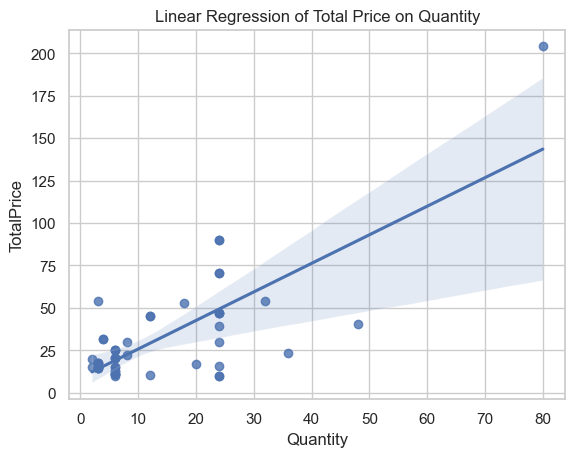

In [24]:
# REGRESSION PLOT BY SEABORN

# Linear Regression plot of Total Price on Quantity
sns.regplot(x='Quantity', y='TotalPrice', data=data)
plt.title('Linear Regression of Total Price on Quantity')
plt.show()


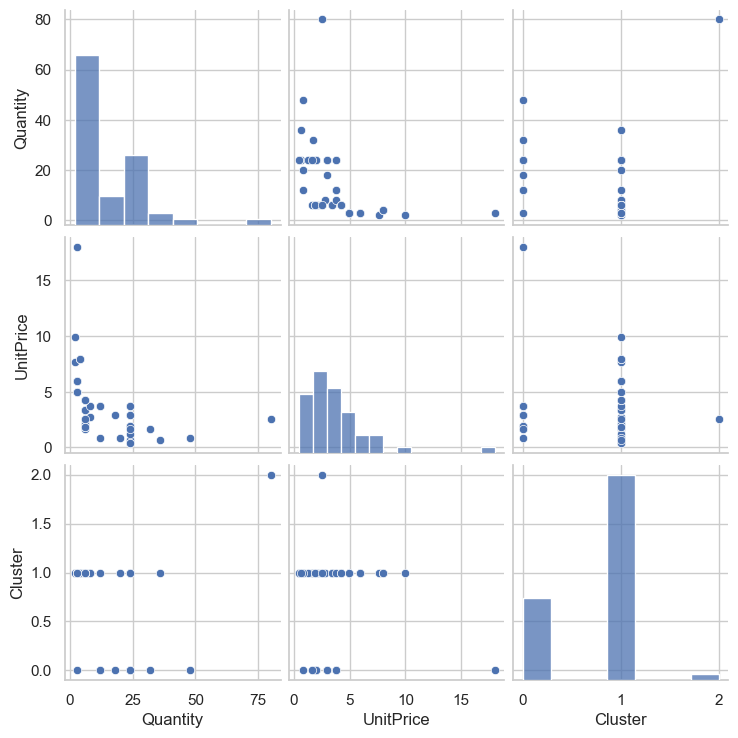

In [25]:
# PAIR-PLOT BY SEABORN

# Pairplot for visualizing relationships between features
sns.pairplot(data[['Quantity', 'UnitPrice', 'Cluster']])
plt.show()

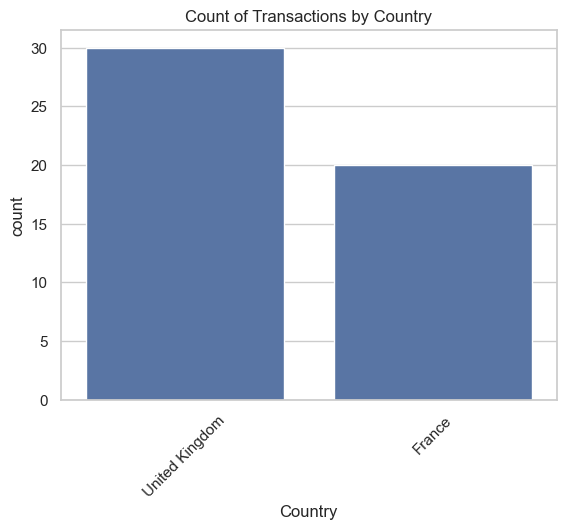

In [26]:
# COUNT-PLOT BY SEABORN 

# Countplot for categorical features (Transactions by Country)
sns.countplot(data=data, x='Country')
plt.title('Count of Transactions by Country')
plt.xticks(rotation=45)
plt.show()


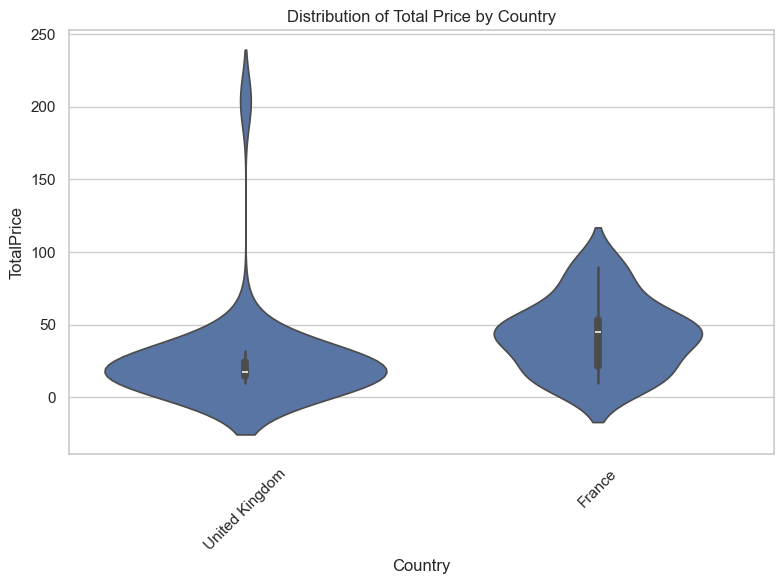

In [27]:
# VIOLIN PLOT BY SEABORN 

# Violin Plot distribution of Total Price by Country
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country', y='TotalPrice', data=data)
plt.title('Distribution of Total Price by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

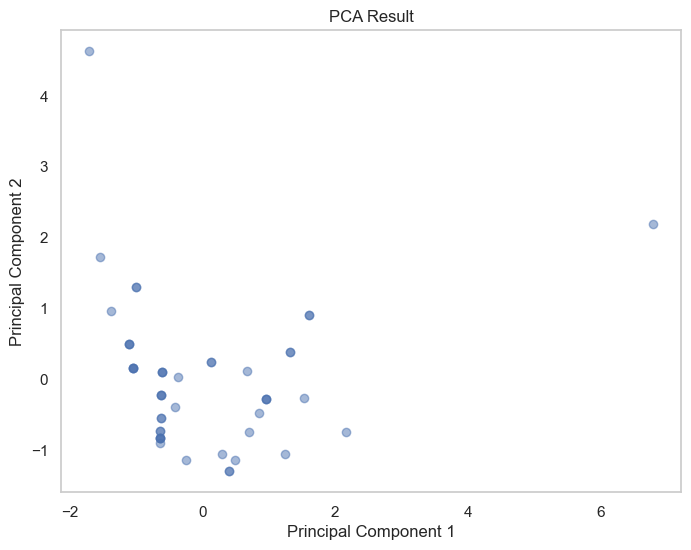

In [28]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your cleaned DataFrame
# Select relevant features
features = data[['Quantity', 'UnitPrice', 'TotalPrice']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [29]:
# Support Vector Machine (SVM)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create labels (e.g., classify high vs low sales)
data['Label'] = (data['TotalPrice'] > data['TotalPrice'].median()).astype(int)

# Prepare features and labels
X = pca_df
y = data['Label'].iloc[features.index]  # Match labels with PCA results

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print('Confusion_matrix(SVM):')
print(confusion_matrix(y_test, y_pred))
print('Classification_report(SVM):')
print(classification_report(y_test, y_pred))

Confusion_matrix(SVM):
[[8 0]
 [1 6]]
Classification_report(SVM):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [30]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print('Confusion_matrix(KNN):')
print(confusion_matrix(y_test, y_pred_knn))
print('Classification_report(KNN):')
print(classification_report(y_test, y_pred_knn))


Confusion_matrix(KNN):
[[8 0]
 [2 5]]
Classification_report(KNN):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.90      0.86      0.86        15
weighted avg       0.89      0.87      0.86        15

